**Alunos: 
Jefferson Costa, 
Sávio Berdine, 
Amanda Lasserre,
Kevin Andrews,
Nicholas Henrique.**

In [11]:
#-*- coding:utf-8 -*-
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

In [12]:
data = pd.read_csv("College.csv")
data.head()

,Unnamed: 0,Private,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
0,Abilene Christian University,Yes,1660,1232,721,23,52,2885,537,7440,3300,450,2200,70,78,18.1,12,7041,60
1,Adelphi University,Yes,2186,1924,512,16,29,2683,1227,12280,6450,750,1500,29,30,12.2,16,10527,56
2,Adrian College,Yes,1428,1097,336,22,50,1036,99,11250,3750,400,1165,53,66,12.9,30,8735,54
3,Agnes Scott College,Yes,417,349,137,60,89,510,63,12960,5450,450,875,92,97,7.7,37,19016,59
4,Alaska Pacific University,Yes,193,146,55,16,44,249,869,7560,4120,800,1500,76,72,11.9,2,10922,15


**Os dados que serão utilizados**<br>
    **Private** A factor with levels No and Yes indicating private or public university     
    **Apps** Number of applications received     
    **Accept** Number of applications accepted     
    **Enroll Number** of new students enrolled     
    **Top10perc** Pct. new students from top 10% of H.S. class     
    **Top25perc** Pct. new students from top 25% of H.S. class     
    **F.Undergrad** Number of fulltime undergraduates     
    **P.Undergrad** Number of parttime undergraduates     
    **Outstate** Out-of-state tuition     
    **Room.Board** Room and board costs     
    **Books** Estimated book costs     
    **Personal** Estimated personal spending     
    **PhD Pct.** of faculty with Ph.D.’s     
    **Terminal Pct.** of faculty with terminal degree     
    **S.F.Ratio** Student/faculty ratio     
    **perc.alumni** Pct. alumni who donate     
    **Expend Instructional** expenditure per student     
    **Grad.Rate** Graduation rate<br>
**Observe que temos 18 variáveis**

Uma comparação entre o número de estudantes "fulltime" de universidade privas e universidades públicas

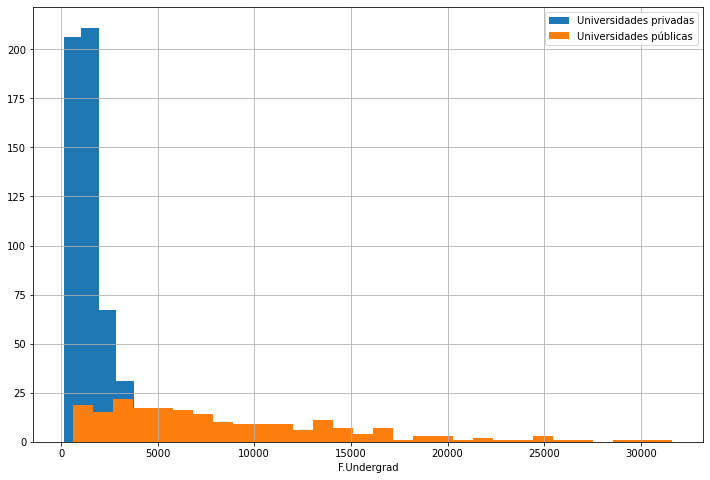

In [13]:
plt.figure(figsize=(12, 8))

data.loc[data.Private == 'Yes', 'F.Undergrad'].hist(label="Universidades privadas", bins=30)
data.loc[data.Private == 'No', 'F.Undergrad'].hist(label="Universidades públicas", bins=30)

plt.xlabel('F.Undergrad')
plt.legend()
